In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100, shuffle = True) 
clf = KNN(k = 3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum((predictions == y_test)/len(y_test))*100
print(predictions)
print(accuracy)



[[6.4 2.8 5.6 2.1]
 [4.8 3.4 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [5.7 4.4 1.5 0.4]
 [6.3 2.7 4.9 1.8]
 [7.7 3.  6.1 2.3]
 [5.2 4.1 1.5 0.1]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.5 1.8]
 [4.8 3.  1.4 0.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.  3.4 1.6 0.4]
 [5.2 3.4 1.4 0.2]
 [6.7 3.  5.2 2.3]
 [6.2 2.9 4.3 1.3]
 [6.  2.2 4.  1. ]
 [6.7 3.  5.  1.7]
 [7.7 2.8 6.7 2. ]
 [6.8 3.  5.5 2.1]
 [7.2 3.2 6.  1.8]
 [5.4 3.4 1.5 0.4]
 [6.3 2.5 5.  1.9]
 [4.7 3.2 1.6 0.2]
 [5.6 2.5 3.9 1.1]
 [5.9 3.  5.1 1.8]
 [6.6 3.  4.4 1.4]
 [5.4 3.4 1.7 0.2]
 [6.1 2.8 4.7 1.2]
 [6.9 3.2 5.7 2.3]]


ValueError: operands could not be broadcast together with shapes (30,4) (120,4) 

In [246]:
import numpy as np
from collections import Counter

def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis = 1))

def manhattan(x1, x2):
    return(np.sum((np.abs(x1 - x2)), axis = 1))

def minkowski(x1, x2, minkow_p):
     return(np.power(np.sum(np.power((np.abs(x1 - x2)), minkow_p), axis = 1), 1/minkow_p))

class KNN:
    def __init__(self, k=3, weighted = False, p = 2, dist = 'euclidean', minkow_p = 2):
        self.k = k
        self.weighted_knn = weighted
        self.p = p
        self.dist = dist
        self.minkow_p = minkow_p
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        ytrain_set = set(self.y_train) 
        # convert the set to the list 
        self.ytrain_uniq = (list(ytrain_set)) 
        
        
    def predict(self, X):
        #Predict label for given datapoint(s)
        predicted_labels = [self._predict(X) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, X):
        weighted_dict = {}
        #Compute distance
        if self.dist == 'euclidean':
            distances = euclidean(self.X_train, X)
        elif self.dist == 'manhattan':
            distances = manhattan(self.X_train, X)
        elif self.dist == 'minkowski':
            distances = minkowski(self.X_train, X, self.minkow_p)
        
        print(distances)
        # Optimization step: Adding weights to the knn. If False, using the distances calculated to find argmins
        if self.weighted_knn == True:
            weights = np.power(1/np.power(distances, 2), (1/(self.p-1)))
            print(weights)
            k_weights = np.argsort(weights)[-self.k:][::-1]
            print(k_weights)
        else:
            weights = distances
            k_weights = np.argsort(distances)[:self.k]
        #Get the k nearest distances to the datapoint
        #Get K-nearest neighbours and their labels
        k_nearest_labels = [self.y_train[i] for i in k_weights]
        for i in range(len(k_nearest_labels)):
            for j in range(len(self.ytrain_uniq)):
                if self.ytrain_uniq[j] ==  k_nearest_labels[i]:
                    if k_nearest_labels[i] not in weighted_dict:
                        weighted_dict[k_nearest_labels[i]] = 0
                    weighted_dict[k_nearest_labels[i]] += weights[k_weights[i]]
        #Get majority votes for the class label
        print(weighted_dict)
        member = max(weighted_dict, key = weighted_dict.get)
        return member
        
    
        
    
        

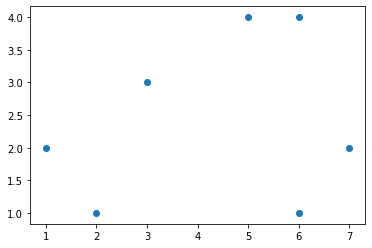

[5.         3.03658897 2.08008382 2.         4.02072576 1.
 1.        ]
{'b': 2.0, 'a': 7.116672794927567}
['a']


In [252]:
X1 = np.array([[1, 2], [3, 3], [5, 4], [6, 4], [2,1], [7,2], [6,1]])
y = np.array(['a', 'a', 'a', 'a', 'b', 'b', 'b'])
test_A = np.array([X1[x][0] for x in range(len(X1))])
test_B = np.array([X1[x][1] for x in range(len(X1))])
plt.figure()
plt.scatter(test_A, test_B)
plt.show()
X2 = np.array([[6,2]])
clf = KNN(k = 5, weighted = False, p = 3, dist = 'minkowski', minkow_p = 3)
clf.fit(X1, y)
predictions = clf.predict(X2)
print(predictions)


In [253]:
normal_A = (test_A - min(test_A))/(max(test_A) - min(test_A))
normal_B = (test_B - min(test_B))/(max(test_B) - min(test_B))
print(normal_A)
print(normal_B)
X_norm = pd.DataFrame([normal_A, normal_B])
print(X_norm)
clf = KNN(k = 3, weighted = False, p = 2, dist = 'euclidean', minkow_p = 3)
clf.fit(X1, y)
predictions = clf.predict(X2)
print(predictions)
[0.33333333 0.66666667 1.         1.         0.         0.33333333
 0.        ]

[0.         0.33333333 0.66666667 0.83333333 0.16666667 1.
 0.83333333]
[0.33333333 0.66666667 1.         1.         0.         0.33333333
 0.        ]
          0         1         2         3         4         5         6
0  0.000000  0.333333  0.666667  0.833333  0.166667  1.000000  0.833333
1  0.333333  0.666667  1.000000  1.000000  0.000000  0.333333  0.000000
[5.         3.16227766 2.23606798 2.         4.12310563 1.
 1.        ]
{'b': 2.0, 'a': 2.0}
['b']


In [48]:
import os
data = pd.read_excel(os.getcwd()+'/wine.xlsx')
input_data = data.iloc[:, :-1]
output_data = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state =100, shuffle = True)
clf = KNN(k = 3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(len(predictions))
print(len(y_test))
accuracy = np.sum((predictions == y_test)/len(y_test))*100
print(predictions)
print(accuracy)


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
82    0.0
83    0.0
84    0.0
85    0.0
86    0.0
Length: 87, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4

C:\Users\Viswanathan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


ValueError: Lengths must match to compare

In [86]:
nlist = np.array([5, 3.16227766, 2.23606798, 2, 4.12310563, 1, 1])
k = 3
print(nlist.argsort()[-3:][::-1])

[0 4 1]
